#Task-2:   Exploring Supervised Learning

**Problem Statement:**
Predicting the marks of the students based on the no hours they study.


#Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Overview of dataset

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#Checking the General information about data set

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#Checking general stastitics

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Visualizing the distribution of data

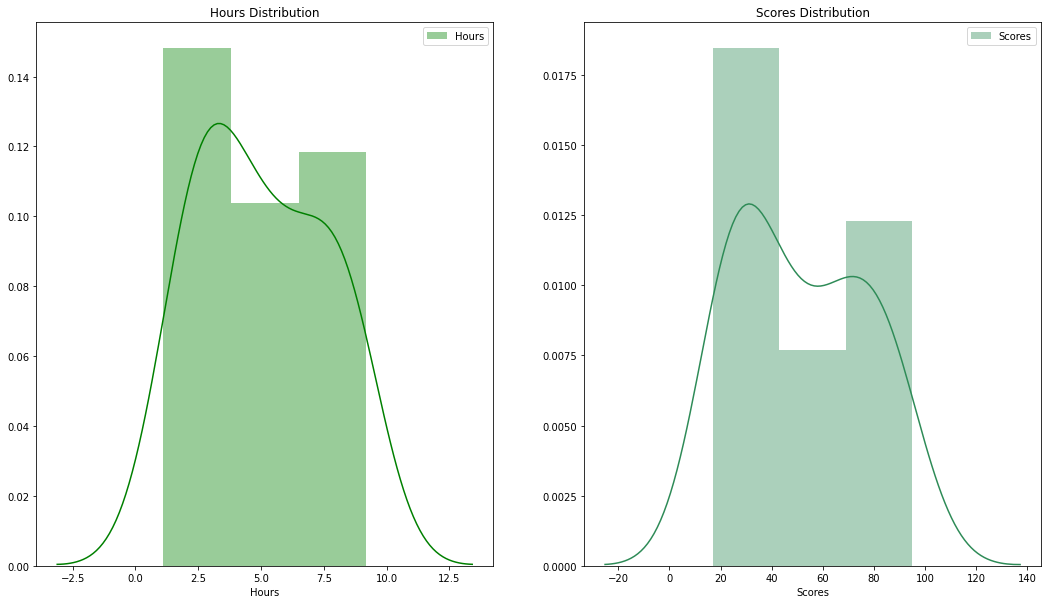

In [6]:
fig = plt.figure(figsize=(18,10))

s1 = fig.add_subplot(121)
s2 = fig.add_subplot(122)

s1.set_title('Hours Distribution')
s2.set_title('Scores Distribution')

g1 = sns.distplot(data['Hours'] , label='Hours' , ax=s1 , color='green')

g2 = sns.distplot(data['Scores'] , label='Scores' , ax=s2 , color='seagreen')

g1.legend()
g2.legend()

plt.show()


#Visualizing the realation between variable

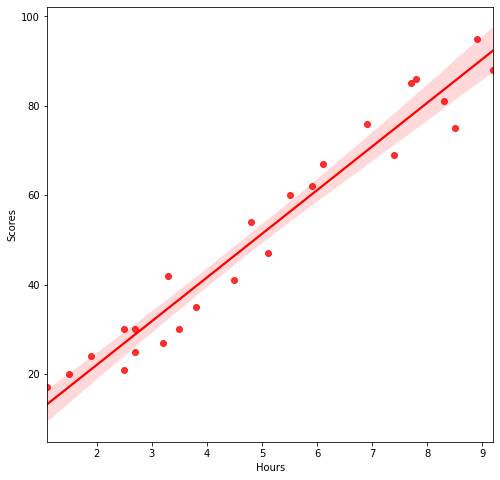

In [7]:
plt.figure(figsize=(8,8))
sns.regplot(data['Hours'] , data['Scores'] , color='red')
plt.show()

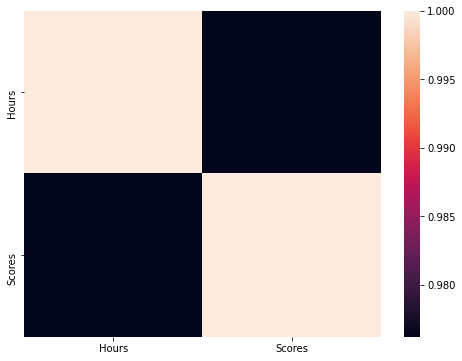

In [8]:
plt.figure(figsize=(8,6))
corr=data.corr()
sns.heatmap(corr)
plt.show()

#Segragating dependent and independent variable

In [9]:
x = data.iloc[: ,:-1].values
y = data.iloc[: ,1 ].values

#Spliting dataset into train and test dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_x, test_x , train_y , test_y = train_test_split(x , y , random_state=0 ,test_size=0.2 )

#Linear Regression model

In [12]:
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()
Lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Making the prediction 

In [13]:
train_predict = Lreg.predict(train_x)
test_predict = Lreg.predict(test_x)

#Checking the performance of the model using evaluation matrix

In [14]:
from sklearn.metrics import mean_absolute_error as mse
s1 = mse(train_y , train_predict)
s2 = np.sqrt(mse(train_y , train_predict))

score1 = mse(test_y , test_predict)
score2 = np.sqrt(mse(test_y , test_predict))
print("=======train dataset========")
print("Mean squared error: " , s1.round(3))
print("Root mean squared error: " ,s2.round(3))


print("=======Test dataset===========")
print("Mean squared error: " , score1.round(3))
print("Root mean squared error: " ,score2.round(3))

print("============================")
print("Train score: " , Lreg.score(train_x , train_y))
print("Test score: " ,Lreg.score(test_x , test_y))


=======train dataset========
Mean squared error:  5.187
Root mean squared error:  2.277
=======Test dataset===========
Mean squared error:  4.184
Root mean squared error:  2.045
Train score:  0.9515510725211553
Test score:  0.9454906892105354


#Comparing actual values and predicted values

In [15]:
Compare = pd.DataFrame({'Actual' : test_y , 'predicted':test_predict , 'Deviation' : abs(test_y - test_predict)})
Compare.head()

,Actual,predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


#Deviation in the Predicted value

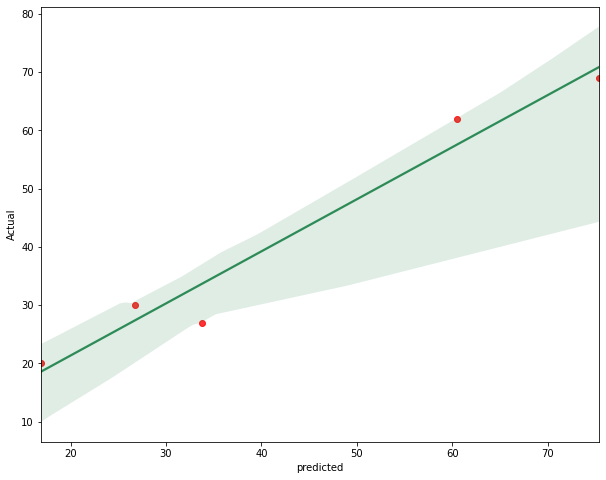

In [16]:
plt.figure(figsize=(10,8))
sns.regplot('predicted' ,'Actual' , data=Compare , line_kws={'color':'seagreen'} , scatter_kws={'color' : 'red'})
plt.show()

#Ridge Regression




In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.05 , normalize=True)
ridge.fit(train_x, train_y)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

#Making Predictions

In [18]:
train_predited1 = ridge.predict(train_x)
test_predicted1 = ridge.predict(test_x)

#Checking the performance of the model

In [19]:
s1 = mse(train_y , train_predited1)
s2 = np.sqrt(mse(train_y , train_predited1))

score1 = mse(test_y , test_predicted1)
score2 = np.sqrt(mse(test_y , test_predicted1))
print("=======train dataset========")
print("Mean squared error: " , s1.round(3))
print("Root mean squared error: " ,s2.round(3))


print("=======Test dataset===========")
print("Mean squared error: " , score1.round(3))
print("Root mean squared error: " ,score2.round(3))
print("==========================================")
print("Train score: " , ridge.score(train_x , train_y))
print("Test score: " ,ridge.score(test_x , test_y))

=======train dataset========
Mean squared error:  5.142
Root mean squared error:  2.268
=======Test dataset===========
Mean squared error:  3.623
Root mean squared error:  1.903
Train score:  0.9493933603385677
Test score:  0.9512929715485207


#Comparing Actual and Predicted values

In [20]:
Compare1 = pd.DataFrame({'Actual' : test_y , 'predicted':test_predicted1 , 'Deviation' : abs(test_y - test_predicted1)})
Compare1.head()

,Actual,predicted,Deviation
0,20,18.649185,1.350815
1,27,34.695010,7.695010
2,69,74.337636,5.337636
3,30,28.087906,1.912094
4,62,60.179556,1.820444


#Deviation from the Actual values

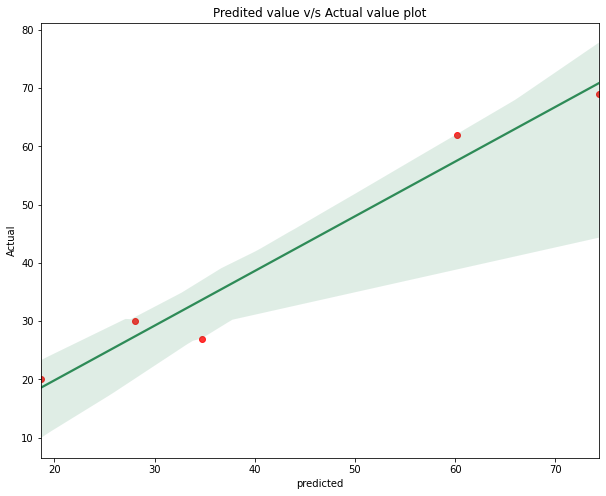

In [21]:
plt.figure(figsize=(10,8))
sns.regplot('predicted' ,'Actual' , data=Compare1 , line_kws={'color':'seagreen'} , scatter_kws={'color' : 'red'})
plt.title("Predited value v/s Actual value plot")
plt.show()

#LASSO Regression

In [22]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=1 , normalize=True)
lassoReg.fit(train_x, train_y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

#Making the Predictions

In [23]:
train_predited2 = lassoReg.predict(train_x)
test_predicted2 = lassoReg.predict(test_x)

#Checking the performance of the model

In [24]:
s1 = mse(train_y , train_predited2)
s2 = np.sqrt(mse(train_y , train_predited2))

score1 = mse(test_y , test_predicted2)
score2 = np.sqrt(mse(test_y , test_predicted2))
print("=======train dataset========")
print("Mean squared error: " , s1.round(3))
print("Root mean squared error: " ,s2.round(3))


print("=======Test dataset===========")
print("Mean squared error: " , score1.round(3))
print("Root mean squared error: " ,score2.round(3))
print("==========================================")
print("Train score: " , lassoReg.score(train_x , train_y))
print("Test score: " ,lassoReg.score(test_x , test_y))

=======train dataset========
Mean squared error:  6.391
Root mean squared error:  2.528
=======Test dataset===========
Mean squared error:  4.182
Root mean squared error:  2.045
Train score:  0.9201906987054994
Test score:  0.9305378192158947


#Comparing the actual and predicted values

In [26]:
Compare1 = pd.DataFrame({'Actual' : test_y , 'predicted':test_predicted2 , 'Deviation' : abs(test_y - test_predicted2)})
Compare1.head()

,Actual,predicted,Deviation
0,20,23.613115,3.613115
1,27,37.402608,10.402608
2,69,71.470768,2.470768
3,30,31.724581,1.724581
4,62,59.303568,2.696432


#Deviation from actual values

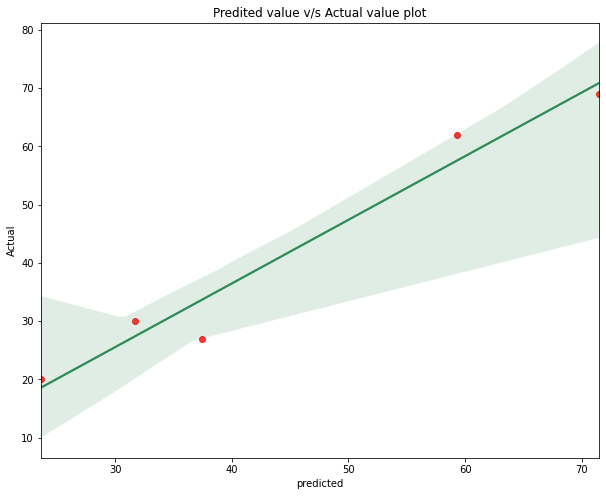

In [27]:
plt.figure(figsize=(10,8))
sns.regplot('predicted' ,'Actual' , data=Compare1 , line_kws={'color':'seagreen'} , scatter_kws={'color' : 'red'})
plt.title("Predited value v/s Actual value plot")
plt.show()

#Elastic Net Regression

In [38]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha=0.05, l1_ratio=0.5, normalize=False)
ENreg.fit(train_x, train_y)


ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

#Making Predictions

In [40]:
train_predited3 = ENreg.predict(train_x)
test_predicted3 = ENreg.predict(test_x)

#Checking Performance of the model

In [41]:
s1 = mse(train_y , train_predited3)
s2 = np.sqrt(mse(train_y , train_predited3))

score1 = mse(test_y , test_predicted3)
score2 = np.sqrt(mse(test_y , test_predicted3))
print("=======train dataset========")
print("Mean squared error: " , s1.round(3))
print("Root mean squared error: " ,s2.round(3))


print("=======Test dataset===========")
print("Mean squared error: " , score1.round(3))
print("Root mean squared error: " ,score2.round(3))
print("==========================================")
print("Train score: " , ENreg.score(train_x , train_y))
print("Test score: " ,ENreg.score(test_x , test_y))

=======train dataset========
Mean squared error:  5.182
Root mean squared error:  2.277
=======Test dataset===========
Mean squared error:  4.132
Root mean squared error:  2.033
Train score:  0.9515323420169796
Test score:  0.9463234360286942


#Comparing the actual and predicted values

In [42]:
Compare1 = pd.DataFrame({'Actual' : test_y , 'predicted':test_predicted3 , 'Deviation' : abs(test_y - test_predicted3)})
Compare1.head()

,Actual,predicted,Deviation
0,20,17.048594,2.951406
1,27,33.821961,6.821961
2,69,75.262042,6.262042
3,30,26.915280,3.084720
4,62,60.462013,1.537987


#Deviation in the actual values

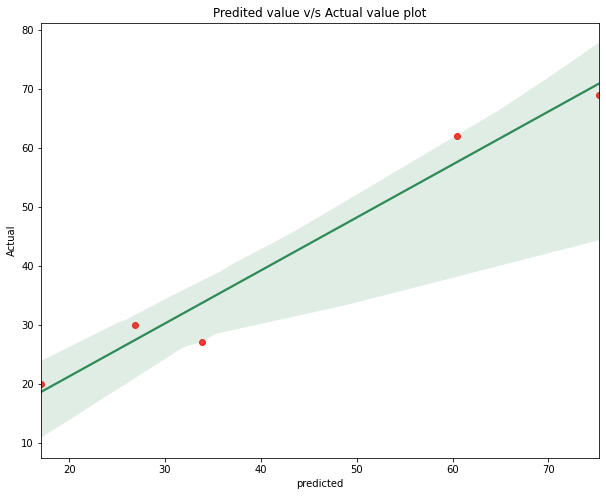

In [43]:
plt.figure(figsize=(10,8))
sns.regplot('predicted' ,'Actual' , data=Compare1 , line_kws={'color':'seagreen'} , scatter_kws={'color' : 'red'})
plt.title("Predited value v/s Actual value plot")
plt.show()

#Comparing the model

In [46]:
Compare_model = pd.DataFrame({'Linear Regression' : {
    'test_score':Lreg.score(test_x , test_y),
    'train_score':Lreg.score(train_x , train_y)
} ,'Ridge Regression':{
    'test_score':ridge.score(test_x,test_y),
    'train_score':ridge.score(train_x,train_y)
},'Lasso Regression':{
    'test_score':lassoReg.score(test_x, test_y),
    'train_score':lassoReg.score(train_x,train_y)
},'Elastic Net':{
    'test_score':ENreg.score(test_x , test_y),
    'train_score':ENreg.score(train_x , train_y)
}})
Compare_model.head()

,Linear Regression,Ridge Regression,Lasso Regression,Elastic Net
test_score,0.945491,0.951293,0.930538,0.946323
train_score,0.951551,0.949393,0.920191,0.951532


As we can see performance of Ridge regression model is better on the data set.


In [47]:
n=float(input("Enter the value of Hours"))
result=ridge.predict([[n]])
print("After studying for {} hours, The Expected Score Should be {}".format(n,result.round(2)))

Enter the value of Hours9.25
After studying for 9.25 hours, The Expected Score Should be [91.8]
